# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | colonia
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | sandnessjoen
Processing Record 4 of Set 1 | keflavik
Processing Record 5 of Set 1 | cabedelo
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | lyasny
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | zhaqsy
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | nadi
Processing Record 14 of Set 1 | utrik
Processing Record 15 of Set 1 | niquero
Processing Record 16 of Set 1 | saipan
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | alofi
Processing Record 19 of Set 1 | holualoa
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | tazovsky
Processing Record 22 of Set 1 | selfoss
Processing Record 23 of Set 1 | balotra
Processing

Processing Record 41 of Set 4 | san andres
Processing Record 42 of Set 4 | sokoni
Processing Record 43 of Set 4 | arar
Processing Record 44 of Set 4 | katsuura
Processing Record 45 of Set 4 | popondetta
Processing Record 46 of Set 4 | meghraj
Processing Record 47 of Set 4 | borogontsy
Processing Record 48 of Set 4 | bodo
Processing Record 49 of Set 4 | port macquarie
Processing Record 0 of Set 5 | bodaybo
Processing Record 1 of Set 5 | hayma'
City not found. Skipping...
Processing Record 2 of Set 5 | juegang
Processing Record 3 of Set 5 | menongue
Processing Record 4 of Set 5 | durban
Processing Record 5 of Set 5 | fort bragg
Processing Record 6 of Set 5 | cedral
Processing Record 7 of Set 5 | nemuro
Processing Record 8 of Set 5 | uturoa
Processing Record 9 of Set 5 | darwin
Processing Record 10 of Set 5 | hawaiian paradise park
Processing Record 11 of Set 5 | thanh hoa
Processing Record 12 of Set 5 | samana
Processing Record 13 of Set 5 | vorgashor
Processing Record 14 of Set 5 | ixta

Processing Record 30 of Set 8 | ewo
Processing Record 31 of Set 8 | presidente epitacio
Processing Record 32 of Set 8 | anna regina
Processing Record 33 of Set 8 | greymouth
Processing Record 34 of Set 8 | agdas
Processing Record 35 of Set 8 | lazaro cardenas
Processing Record 36 of Set 8 | guiuan
Processing Record 37 of Set 8 | butte
Processing Record 38 of Set 8 | gedo
Processing Record 39 of Set 8 | hotan
Processing Record 40 of Set 8 | santo antonio do ica
Processing Record 41 of Set 8 | kalifornsky
Processing Record 42 of Set 8 | puerto san jose
Processing Record 43 of Set 8 | punta arenas
Processing Record 44 of Set 8 | verkhnevilyuysk
Processing Record 45 of Set 8 | shingu
Processing Record 46 of Set 8 | weno
Processing Record 47 of Set 8 | ambalangoda
Processing Record 48 of Set 8 | tadine
Processing Record 49 of Set 8 | katangi
Processing Record 0 of Set 9 | udaipur
Processing Record 1 of Set 9 | roswell
Processing Record 2 of Set 9 | ghadamis
Processing Record 3 of Set 9 | mo

Processing Record 21 of Set 12 | las terrenas
Processing Record 22 of Set 12 | yanykurgan
Processing Record 23 of Set 12 | gorontalo
Processing Record 24 of Set 12 | puerto cabezas
Processing Record 25 of Set 12 | errachidia
Processing Record 26 of Set 12 | sao vicente
Processing Record 27 of Set 12 | bosobolo
Processing Record 28 of Set 12 | galashiels
Processing Record 29 of Set 12 | calintaan
Processing Record 30 of Set 12 | khorixas
Processing Record 31 of Set 12 | sampit
Processing Record 32 of Set 12 | waingapu
Processing Record 33 of Set 12 | alesund
Processing Record 34 of Set 12 | muana
Processing Record 35 of Set 12 | tolanaro
Processing Record 36 of Set 12 | aoulef
Processing Record 37 of Set 12 | koya
Processing Record 38 of Set 12 | lubango
Processing Record 39 of Set 12 | gadani
Processing Record 40 of Set 12 | vila franca do campo
Processing Record 41 of Set 12 | pingliang
Processing Record 42 of Set 12 | blairgowrie
Processing Record 43 of Set 12 | hohhot
Processing Rec

In [45]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,colonia,50.9333,6.9500,11.57,81,75,9.26,DE,1707267634
1,iqaluit,63.7506,-68.5145,-21.15,59,0,7.20,CA,1707267725
2,sandnessjoen,66.0217,12.6316,-15.71,92,100,5.89,NO,1707267725
3,keflavik,64.0049,-22.5624,-1.05,74,20,10.29,IS,1707267726
4,cabedelo,-6.9811,-34.8339,28.37,78,15,4.32,BR,1707267726


In [19]:
pwd

'/Users/samantha/Desktop/Data-Analyst/Projects/Python-API-Challenge'

In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,colonia,50.9333,6.9500,11.57,81,75,9.26,DE,1707267634
1,iqaluit,63.7506,-68.5145,-21.15,59,0,7.20,CA,1707267725
2,sandnessjoen,66.0217,12.6316,-15.71,92,100,5.89,NO,1707267725
3,keflavik,64.0049,-22.5624,-1.05,74,20,10.29,IS,1707267726
4,cabedelo,-6.9811,-34.8339,28.37,78,15,4.32,BR,1707267726


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

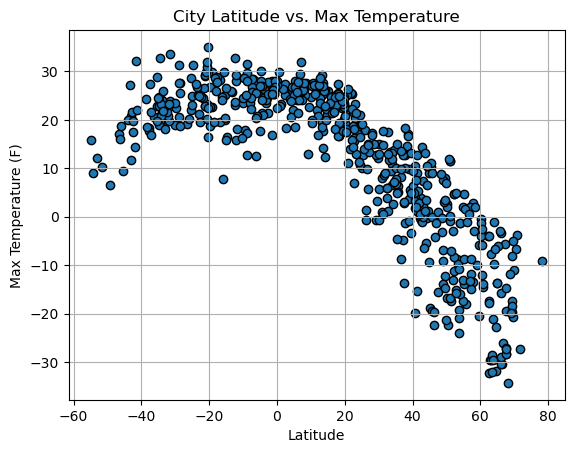

In [49]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

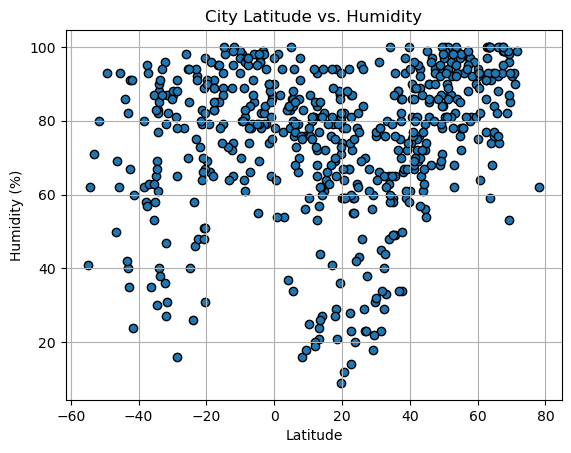

In [50]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

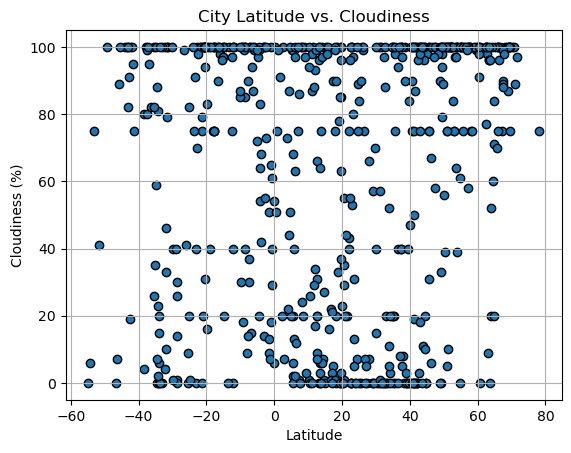

In [51]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

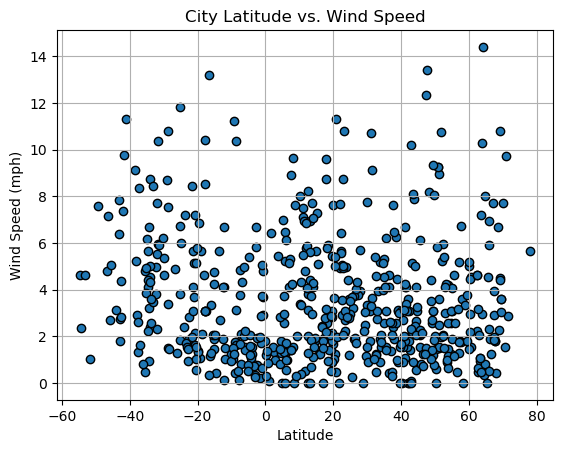

In [52]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, line_eq_position):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    
    # Create equation of the line
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    
    # Annotate the line equation on the plot
    plt.annotate(line_eq, line_eq_position, fontsize=15, color="red")
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Display the correlation coefficient
    print(f"The correlation coefficient (r-value) is: {round(rvalue, 2)}")
    

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,colonia,50.9333,6.9500,11.57,81,75,9.26,DE,1707267634
1,iqaluit,63.7506,-68.5145,-21.15,59,0,7.20,CA,1707267725
2,sandnessjoen,66.0217,12.6316,-15.71,92,100,5.89,NO,1707267725
3,keflavik,64.0049,-22.5624,-1.05,74,20,10.29,IS,1707267726
7,lyasny,54.0072,27.6963,-1.35,99,100,4.19,BY,1707267727


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,cabedelo,-6.9811,-34.8339,28.37,78,15,4.32,BR,1707267726
5,hermanus,-34.4187,19.2345,19.89,83,0,6.69,ZA,1707267469
6,adamstown,-25.0660,-130.1015,25.00,85,82,3.83,PN,1707267474
8,grytviken,-54.2811,-36.5092,8.93,62,6,2.34,GS,1707267727
10,port-aux-francais,-49.3500,70.2167,6.47,93,100,7.60,TF,1707267728


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is: -0.88


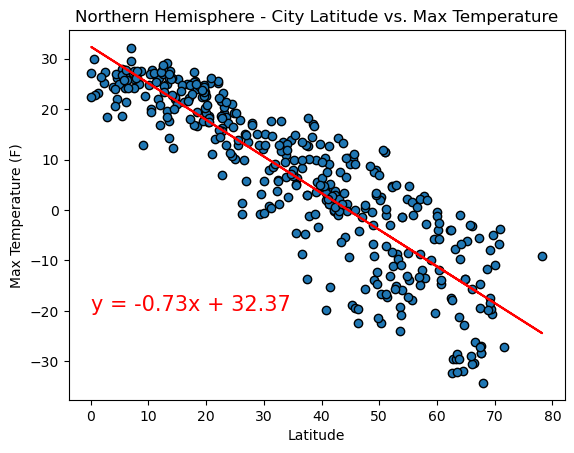

In [56]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere - City Latitude vs. Max Temperature", 
                       "Latitude", "Max Temperature (F)", (0, -20))

The correlation coefficient (r-value) is: 0.39


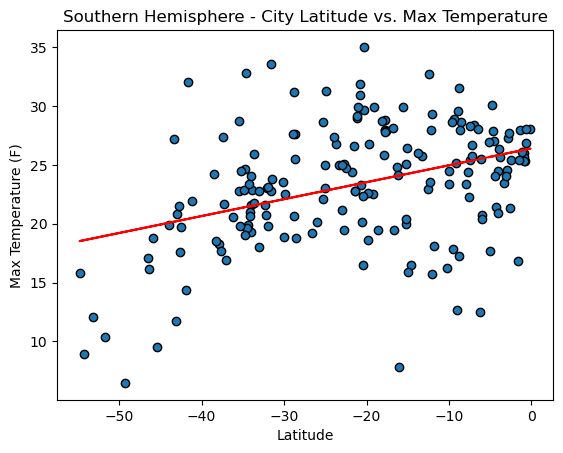

In [57]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere - City Latitude vs. Max Temperature", 
                       "Latitude", "Max Temperature (F)", (-50, 80))

**Discussion about the linear relationship:** 

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is: 0.38


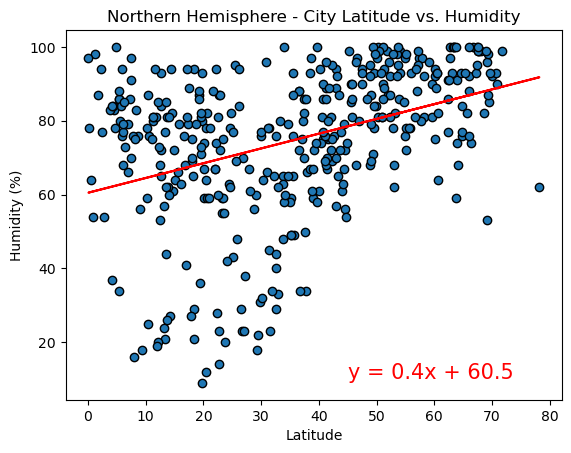

In [58]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere - City Latitude vs. Humidity", 
                       "Latitude", "Humidity (%)", (45, 10))

The correlation coefficient (r-value) is: 0.15


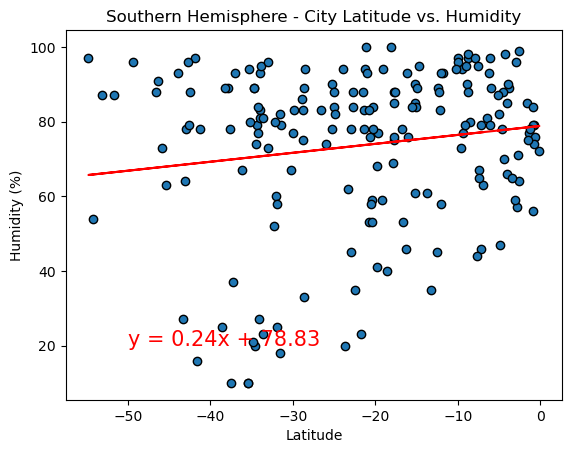

In [37]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere - City Latitude vs. Humidity", 
                       "Latitude", "Humidity (%)", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is: 0.34


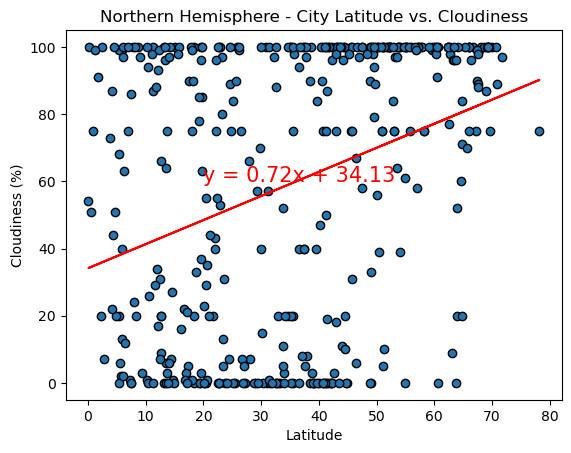

In [59]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere - City Latitude vs. Cloudiness", 
                       "Latitude", "Cloudiness (%)", (20, 60))

The correlation coefficient (r-value) is: 0.12


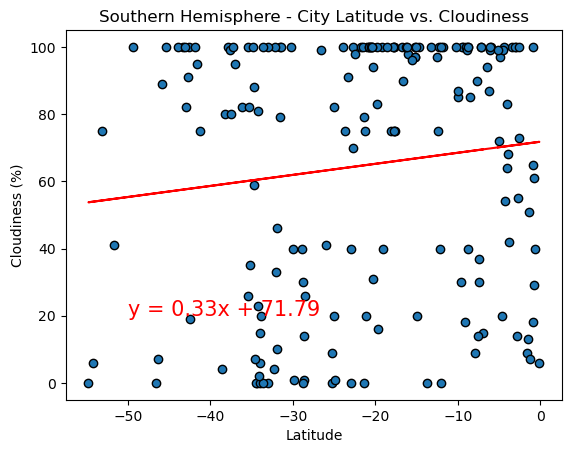

In [60]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere - City Latitude vs. Cloudiness", 
                       "Latitude", "Cloudiness (%)", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is: 0.02


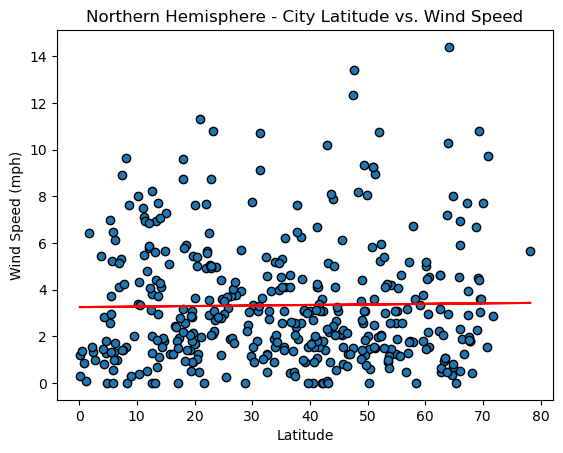

In [61]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere - City Latitude vs. Wind Speed", 
                       "Latitude", "Wind Speed (mph)", (20, 25))

The correlation coefficient (r-value) is: -0.34


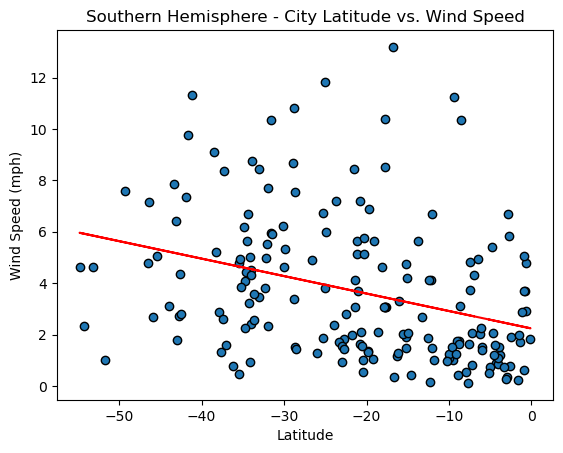

In [68]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere - City Latitude vs. Wind Speed", 
                       "Latitude", "Wind Speed (mph)", (-50, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE